In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from ptycho_v2.tools_v2.ptychography import Ptychography

/home/efe/Desktop/Multiresolution-Framework-for-Fourier-Ptychography/.venv/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
max_scale = 9
max_probe_size = 128
max_shift = 32
device = 'cuda'
linop = Ptychography(max_scale = max_scale,max_probe_size = max_probe_size ,max_shift = max_shift,device=device)


In [3]:
image = plt.imread('images/peppers_reduced.jpg')[:2**7, :2**7] / 255
image_tensor = torch.tensor(image).double().to(device).view(1, 1, 2**7, 2**7)
image_tensor_ = torch.exp(1j * image_tensor)

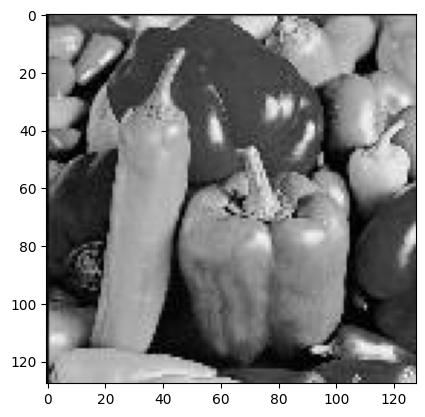

In [4]:
plt.imshow(image, cmap='gray')

In [5]:
a = linop.apply_linop(image_tensor_)
print(a.shape)

torch.Size([1, 289, 512, 512])


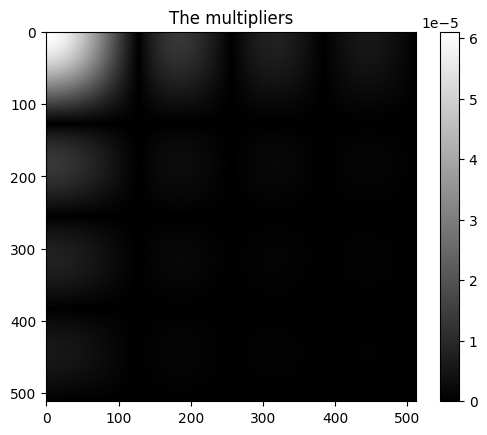

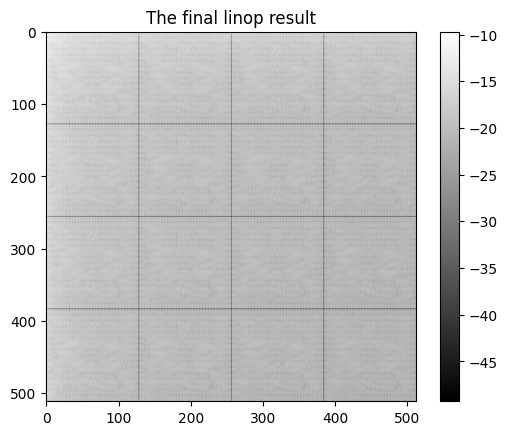

In [6]:

plt.figure()
plt.title("The multipliers")
plt.imshow(torch.abs(linop.multipliers).cpu().numpy(), cmap='gray')
plt.colorbar()
plt.show()

plt.figure()
plt.title("The final linop result")
plt.imshow(torch.log(torch.abs(a[0, 102]).cpu()).numpy(), cmap='gray')
plt.colorbar()
plt.show()


In [7]:
c = linop.apply_linopT(a)

In [8]:
print(c.shape)

torch.Size([1, 1, 128, 128])


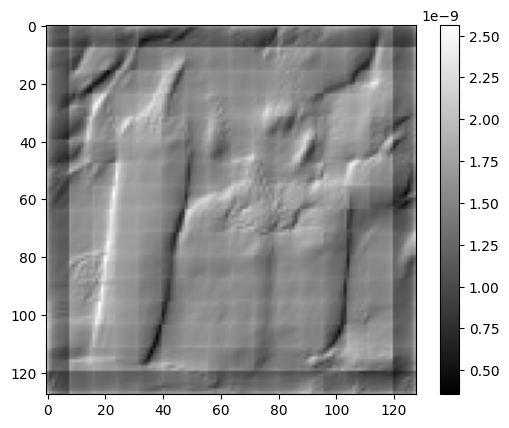

In [9]:
plt.figure()
plt.imshow(torch.abs(c[0, 0]).cpu().numpy(),cmap='gray')
plt.colorbar()
plt.show()

In [10]:
x_t = torch.randn(1, 1, 2**7, 2**7, device=device, dtype=torch.double)
y_t = torch.randn(1, 289, 2**9,2**9, device=device, dtype=torch.double)

In [14]:
a1 = (y_t * linop.apply_linop(x_t)).sum()
a2 = (x_t * linop.apply_linopT(y_t).conj()).sum()

In [15]:
a1

tensor(-0.0037-0.0018j, device='cuda:0', dtype=torch.complex128)

In [16]:
a2

tensor(-0.0037-0.0018j, device='cuda:0', dtype=torch.complex128)